In [1]:
from datasets import NYUDepth, NYUSeg
import dpt.transforms as T
import torch

/home/soumyajit/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def _get_aug_transform(train,grayscale = True, validation = False):
        base_size = 256#240
        crop_size = 200

        min_size = int((0.5 if train else 1.0) * base_size)
        max_size = int((2.0 if train else 1.0) * base_size)
        transforms = []
        print("Doing transform")

        if validation:
            transforms.append(T.RandomResize(base_size,base_size))
            # return T.Compose(transforms)    



        if train:
            transforms.append(T.RandomCrop(crop_size))
            transforms.append(T.RandomHorizontalFlip(0.5))
            transforms.append(T.RandomResize(base_size,base_size))


        if grayscale:
            print("using grayscale")
            transforms.append(T.Grayscale(3))
        transforms.append(T.ToTensor())
        transforms.append(T.ConvertImageDtype(torch.float))
        if grayscale:
            transforms.append(T.Normalize(mean=[0.456, 0.456, 0.456],
                                  std=[0.224, 0.224, 0.224]))
        else:
            transforms.append(T.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225]))
            

        return T.Compose(transforms)

In [3]:
train_data_path = '/home/soumyajit/Documents/random_sampled_ade_train/images'
train_label_path = '/home/soumyajit/Documents/random_sampled_ade_train/annotations'
trans = _get_aug_transform(True,grayscale=False)

Doing transform


In [5]:
dataset = NYUSeg(train_data_path, train_label_path, transforms = trans)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
hellp = dataset[10]

In [16]:
first_input_img = hellp[0]
first_target_img = hellp[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


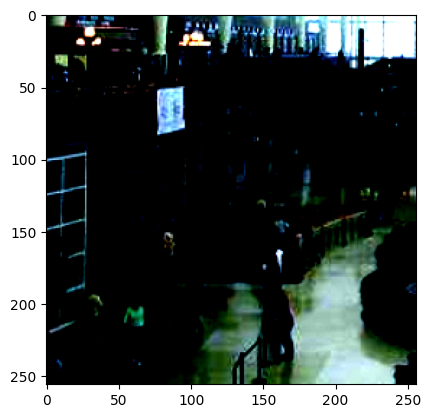

In [17]:
# Load an image
# image = plt.imread('path/to/image.jpg')

# Display the image
image = np.transpose(first_input_img, (1, 2, 0))
plt.imshow(image)
plt.show()

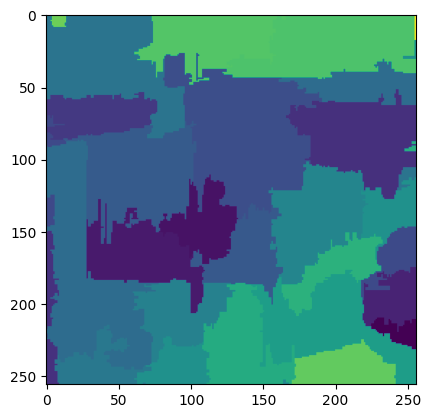

In [18]:
# Display the image
# image = np.transpose(first_target_img, (1, 2, 0))
plt.imshow(first_target_img)
plt.show()